# IIoT Network Analysis
## Exploratory Data Analysis

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('iiot_network_data.csv')

In [3]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,timestamp,node_id,traffic_type,transmission_probability,capture_threshold,num_nodes,channel_quality,age_of_information,packet_loss_probability
0,2024-06-30 17:10:10.430548,61,deadline-oriented,0.9,-0.5,3,0.6,4.760106,0.724432
1,2024-07-01 03:12:10.430548,55,AoI-oriented,0.4,-2.0,2,0.7,4.068644,0.480900
2,2024-06-30 17:44:10.430548,63,deadline-oriented,0.3,0.0,4,0.6,19.007878,0.835932
3,2024-07-01 08:23:10.430548,77,deadline-oriented,0.4,0.0,1,0.3,10.467934,0.730784
4,2024-06-30 17:05:10.430548,44,deadline-oriented,0.7,0.5,2,0.4,14.010374,0.906584


In [4]:
# Show basic information about the dataset
print("\nDataset information:")
df.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   timestamp                 10000 non-null  object 
 1   node_id                   10000 non-null  int64  
 2   traffic_type              10000 non-null  object 
 3   transmission_probability  10000 non-null  float64
 4   capture_threshold         10000 non-null  float64
 5   num_nodes                 10000 non-null  int64  
 6   channel_quality           10000 non-null  float64
 7   age_of_information        10000 non-null  float64
 8   packet_loss_probability   10000 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 703.3+ KB


In [5]:
# Display summary statistics of the numerical columns
print("\nSummary statistics:")
df.describe()


Summary statistics:


C:\Users\lolit\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,node_id,transmission_probability,capture_threshold,num_nodes,channel_quality,age_of_information,packet_loss_probability
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,50.638400,0.548460,-0.001800,5.553100,0.499100,inf,0.853774
std,29.020101,0.288548,1.284664,2.850122,0.317656,NaN,0.184140
min,1.000000,0.100000,-2.000000,1.000000,0.000000,1.000000e+00,0.000000
25%,26.000000,0.300000,-1.000000,3.000000,0.200000,1.032026e+01,0.819893
50%,51.000000,0.500000,0.000000,6.000000,0.500000,2.468121e+01,0.908372
75%,76.000000,0.800000,1.000000,8.000000,0.800000,9.462189e+01,0.968325
max,100.000000,1.000000,2.000000,10.000000,1.000000,inf,1.000000


## Visualizations
### Scatter Plot: Transmission Probability vs. Age of Information

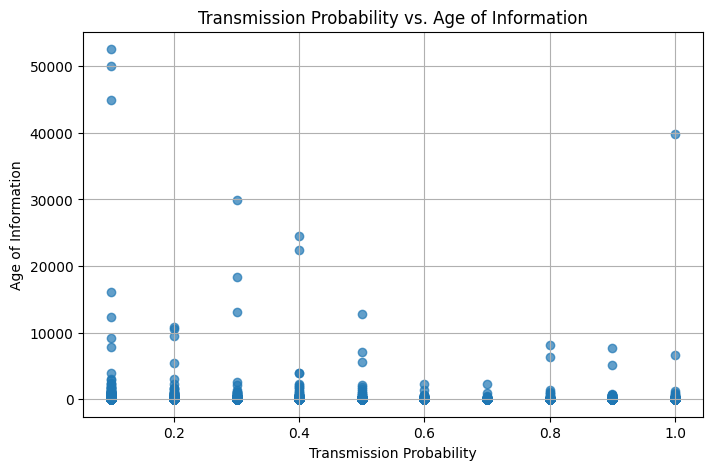

In [6]:
plt.figure(figsize=(8, 5))
plt.scatter(df['transmission_probability'], df['age_of_information'], alpha=0.7)
plt.title('Transmission Probability vs. Age of Information')
plt.xlabel('Transmission Probability')
plt.ylabel('Age of Information')
plt.grid(True)
plt.show()

### Box Plot: Age of Information Grouped by Traffic Type

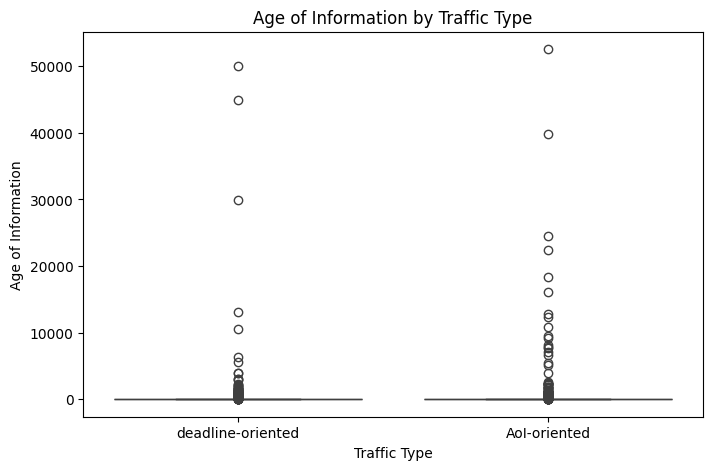

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='traffic_type', y='age_of_information', data=df)
plt.title('Age of Information by Traffic Type')
plt.xlabel('Traffic Type')
plt.ylabel('Age of Information')
plt.show()

### Heatmap: Correlations Between Numerical Variables

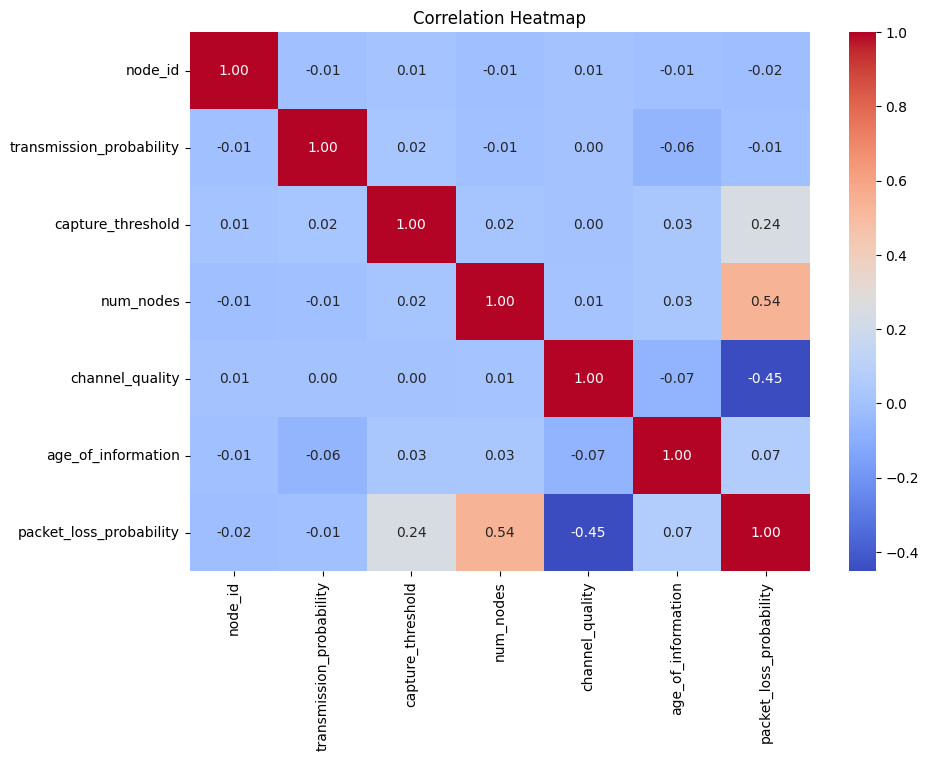

In [8]:
plt.figure(figsize=(10, 7))
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Transmission Probability vs. Age of Information (Scatter Plot)**

As the transmission probability increases, the Age of Information (AoI) generally decreases. Most low AoI values cluster toward higher transmission probabilities, whereas lower transmission probabilities exhibit a wider range of AoI (including very high AoI outliers).

**Age of Information by Traffic Type (Box Plot)**

Both deadline-oriented and AoI-oriented traffic types show a heavily right-skewed distribution for AoI, with many values clustered at relatively low AoI but a few extremely high outliers. The medians between the two traffic types appear close, suggesting they might not differ significantly in typical AoI, although outliers can reach very high levels for both types.

**Correlation Heatmap**

The heatmap reveals that:

- Number of nodes and packet_loss_probability have a moderately positive correlation, indicating more network nodes can lead to higher packet loss rates.

- Age of Information has a modest positive correlation with packet_loss_probability, implying networks experiencing higher AoI may also suffer increased packet loss.

- Transmission probability does not show a strong correlation with AoI in the heatmap, though the scatter plot indicates a trend. This can happen if other variables mediate or interact with the effect of transmission probability on AoI.

## Machine Learning Model Development
### Data Preparation

In [9]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Inspect the first few rows
df.head()

,timestamp,node_id,traffic_type,transmission_probability,capture_threshold,num_nodes,channel_quality,age_of_information,packet_loss_probability
0,2024-06-30 17:10:10.430548,61,deadline-oriented,0.9,-0.5,3,0.6,4.760106,0.724432
1,2024-07-01 03:12:10.430548,55,AoI-oriented,0.4,-2.0,2,0.7,4.068644,0.480900
2,2024-06-30 17:44:10.430548,63,deadline-oriented,0.3,0.0,4,0.6,19.007878,0.835932
3,2024-07-01 08:23:10.430548,77,deadline-oriented,0.4,0.0,1,0.3,10.467934,0.730784
4,2024-06-30 17:05:10.430548,44,deadline-oriented,0.7,0.5,2,0.4,14.010374,0.906584


In [10]:
# Create a copy of the dataframe for modeling
df_model = df.copy()

In [11]:
# Encode the traffic_type as dummy variables
df_model = pd.get_dummies(df_model, columns=['traffic_type'], drop_first=True)

In [12]:
# Now define features (X) and target (y)
features = [
    'transmission_probability',
    'capture_threshold',
    'num_nodes',
    'channel_quality',
    # 'packet_loss_probability',  # You can include this if you think it influences AoI
    'traffic_type_deadline-oriented'  # or 'traffic_type_AoI-oriented' depending on your original data
]

In [13]:
X = df_model[features]
y = df_model['age_of_information']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()

In [16]:
# Identify which columns are numeric vs. dummy-coded
numeric_cols = [
    'transmission_probability',
    'capture_threshold',
    'num_nodes',
    'channel_quality'
]
dummy_cols = ['traffic_type_deadline-oriented']  # The encoded categorical column

# Fit scaler only on numeric columns
scaler.fit(X_train[numeric_cols])

# Scale numeric columns in X_train
X_train_scaled_numeric = scaler.transform(X_train[numeric_cols])
X_train_scaled = pd.DataFrame(X_train_scaled_numeric, columns=numeric_cols, index=X_train.index)

# Add back the dummy column(s) without scaling
for col in dummy_cols:
    X_train_scaled[col] = X_train[col]

# Do the same transformation for X_test
X_test_scaled_numeric = scaler.transform(X_test[numeric_cols])
X_test_scaled = pd.DataFrame(X_test_scaled_numeric, columns=numeric_cols, index=X_test.index)
for col in dummy_cols:
    X_test_scaled[col] = X_test[col]

### Random Forest Regressor

In [17]:
# Check for infinite values in y_train and y_test
print("Any infinite values in y_train?", np.isinf(y_train).any())
print("Any infinite values in y_test?", np.isinf(y_test).any())

# Replace infinite values with NaN
y_train_clean = y_train.replace([np.inf, -np.inf], np.nan)
y_test_clean = y_test.replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN values in y_train and y_test
train_mask = y_train_clean.notnull()
test_mask = y_test_clean.notnull()

X_train_scaled_clean = X_train_scaled.loc[train_mask]
y_train_clean = y_train_clean.loc[train_mask]

X_test_scaled_clean = X_test_scaled.loc[test_mask]
y_test_clean = y_test_clean.loc[test_mask]

# Now, train the Random Forest model on the cleaned data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled_clean, y_train_clean)


Any infinite values in y_train? True
Any infinite values in y_test? True


RandomForestRegressor(n_jobs=-1, random_state=42)

### Analysis of Model

In [18]:
# Predict and evaluate
y_pred = rf_model.predict(X_test_scaled_clean)
mse = mean_squared_error(y_test_clean, y_pred)
r2 = r2_score(y_test_clean, y_pred)

print("Random Forest Performance:")
print(f"  MSE: {mse:.2f}")
print(f"  R^2: {r2:.2f}")

Random Forest Performance:
  MSE: 2593566.90
  R^2: -1.56


In [19]:
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)


Feature Importances:
                          Feature  Importance
1               capture_threshold    0.427284
2                       num_nodes    0.234136
3                 channel_quality    0.170853
4  traffic_type_deadline-oriented    0.115542
0        transmission_probability    0.052184


In [20]:
# Example hypothetical data
new_data = pd.DataFrame({
    'transmission_probability': [0.8, 0.3],
    'capture_threshold': [0.5, 0.7],
    'num_nodes': [50, 200],
    'channel_quality': [0.9, 0.4],
    'traffic_type_deadline-oriented': [1, 0]  # e.g., 1 = deadline-oriented, 0 = AoI-oriented
})

# Scale numeric columns
new_data_scaled_numeric = scaler.transform(new_data[numeric_cols])
new_data_scaled = pd.DataFrame(new_data_scaled_numeric, columns=numeric_cols, index=new_data.index)
# Add dummy columns back
new_data_scaled['traffic_type_deadline-oriented'] = new_data['traffic_type_deadline-oriented']

# Predict AoI
new_predictions = rf_model.predict(new_data_scaled)
new_data['predicted_AoI'] = new_predictions

print("\nNew Configurations and Predicted AoI:")
print(new_data)


New Configurations and Predicted AoI:
   transmission_probability  capture_threshold  num_nodes  channel_quality  \
0                       0.8                0.5         50              0.9   
1                       0.3                0.7        200              0.4   

   traffic_type_deadline-oriented  predicted_AoI  
0                               1      30.646083  
1                               0     604.437161  


### a) Key Factors Influencing the AoI-PLP Trade-off

- Transmission Probability:
  Higher transmission probabilities generally result in more frequent data updates, reducing AoI. However, when many nodes transmit simultaneously, this can lead to increased collisions and congestion, thereby elevating PLP. Finding an optimal transmission probability is key to maintaining both fresh and reliable data.

- Network Load and Number of Nodes:
  As the number of active nodes or overall network load increases, the system becomes more congested. Congestion can lead to delayed transmissions, increasing AoI, while also increasing the likelihood of packet losses due to interference. Therefore, scalability of the network and managing node density are important considerations.

- Channel Quality and Capture Threshold:
  Good channel quality (e.g., higher signal-to-noise ratio) tends to improve both AoI and PLP because data is transmitted with fewer errors. Similarly, a properly tuned capture threshold helps in correctly decoding the signal despite interference. However, overly strict thresholds might lead to more packet drops, whereas too lenient thresholds could allow in erroneous data. The right balance is essential to achieve optimal performance.

### b) Strategies for Optimizing Network Performance

**Adaptive Transmission Control:**

- Rationale: Dynamically adjusting the transmission probability based on real-time network conditions (e.g., current network load and interference levels) can help maintain a balance between AoI and PLP.

- Implementation: Use a feedback mechanism where nodes monitor network congestion and adjust their transmission rates accordingly. For instance, in periods of high congestion, nodes might reduce their transmission probability to lower packet collision rates, while in periods of low congestion, they can afford to transmit more frequently, thereby reducing AoI.

**Priority-Based Scheduling:**

- Rationale: Differentiating between AoI-oriented traffic (where data freshness is paramount) and deadline-oriented traffic (where meeting strict timing is critical) allows the network to optimize resource allocation.

- Implementation: Implement a scheduling algorithm that assigns different priority levels to different traffic types. For example, real-time sensor data that is crucial for process control (AoI-oriented) can be given higher priority over less time-sensitive data. This ensures that high-priority packets are transmitted with minimal delay, optimizing both freshness and reliability.

### c) Potential Real-World Applications

**Smart Manufacturing:**

- Application: In a smart factory, real-time sensor data is crucial for process control, maintenance, and safety monitoring.

- Impact: By optimizing network parameters to maintain low AoI while controlling PLP, the system ensures that the control systems receive timely and accurate information. This can reduce downtime, improve the quality of manufacturing, and enhance worker safety by enabling quicker responses to anomalies or potential hazards.

**Autonomous Vehicle Networks:**

- Application: In autonomous vehicle communication networks (e.g., vehicle-to-vehicle or vehicle-to-infrastructure communications), rapid and reliable data exchange is essential for safe navigation and collision avoidance.

- Impact: Understanding and optimizing the trade-off between AoI and PLP ensures that critical information such as vehicle position, speed, and hazard alerts is both fresh and reliably received. This can enhance decision-making in real-time, thereby reducing the risk of accidents and improving overall traffic efficiency.

## Bonus Deep Learning Model

In [22]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load and Clean Data
df = pd.read_csv('iiot_network_data.csv')
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df_clean = df.dropna()
print("Cleaned data shape:", df_clean.shape)




Cleaned data shape: (8603, 9)


C:\Users\lolit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,530 (9.88 KB)

 Trainable params: 2,530 (9.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 491169.6562 - mae: 47.0516 - val_loss: 1580184.5000 - val_mae: 75.3926
Epoch 2/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 342737.1562 - mae: 35.0178 - val_loss: 1571020.0000 - val_mae: 74.8171
Epoch 3/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - loss: 410714.8125 - mae: 47.5028 - val_loss: 1563433.7500 - val_mae: 81.2918
Epoch 4/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 373020.8750 - mae: 57.4615 - val_loss: 1558603.2500 - val_mae: 88.4539
Epoch 5/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 824289.3750 - mae: 69.9554 - val_loss: 1557243.2500 - val_mae: 88.5365
Epoch 6/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 544587.6250 - mae: 61.8768 - val_loss: 1556010.5000 - val_mae: 89.4268
Epoch 7/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - loss: 562881.8125 - mae: 59.2709 - val_loss: 1555438.7500 - val_mae: 89.4380
Epoch 8/50
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - loss: 788296.43

In [ ]:
# For the bonus challenge, we use these columns:
# Features: transmission_probability, capture_threshold, num_nodes, channel_quality, traffic_type
# Targets: age_of_information and packet_loss_probability

In [ ]:
# Create a copy for modeling and encode the categorical variable 'traffic_type'
df_model = df_clean.copy()
df_model = pd.get_dummies(df_model, columns=['traffic_type'], drop_first=True)

In [ ]:
# Define features and multi-target columns
features = [
    'transmission_probability',
    'capture_threshold',
    'num_nodes',
    'channel_quality',
    'traffic_type_deadline-oriented'  # adjust if needed
]
target_multi = ['age_of_information', 'packet_loss_probability']

X = df_model[features]
y_multi = df_model[target_multi]

In [ ]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y_multi, test_size=0.2, random_state=42)

In [ ]:
# Scale the Data
# Identify numeric columns (we assume the dummy column is already binary and doesn't need scaling)
numeric_cols = ['transmission_probability', 'capture_threshold', 'num_nodes', 'channel_quality']

scaler = StandardScaler()
X_train_scaled_numeric = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled_numeric = scaler.transform(X_test[numeric_cols])

# Convert scaled data back to DataFrame and add the dummy column
X_train_scaled = pd.DataFrame(X_train_scaled_numeric, columns=numeric_cols, index=X_train.index)
X_train_scaled['traffic_type_deadline-oriented'] = X_train['traffic_type_deadline-oriented']

X_test_scaled = pd.DataFrame(X_test_scaled_numeric, columns=numeric_cols, index=X_test.index)
X_test_scaled['traffic_type_deadline-oriented'] = X_test['traffic_type_deadline-oriented']

In [ ]:
# Build the Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(2)  # Two outputs: one for AoI and one for PLP
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

In [ ]:
# Train the Model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.1,
    epochs=50,
    batch_size=32,
    verbose=1
)

In [ ]:
# Evaluate the Model on the Test Set
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print("\nDeep Learning Model Evaluation:")
print(f"  Test Loss (MSE): {loss:.2f}")
print(f"  Test MAE: {mae:.2f}")

In [ ]:
# Make Predictions and Evaluate Individually
predictions = model.predict(X_test_scaled)
predictions_aoi = predictions[:, 0]  # AoI predictions
predictions_plp = predictions[:, 1]  # PLP predictions

mse_aoi = mean_squared_error(y_test['age_of_information'], predictions_aoi)
r2_aoi = r2_score(y_test['age_of_information'], predictions_aoi)
print("\nAoI Prediction Metrics (Deep Learning):")
print(f"  MSE: {mse_aoi:.2f}")
print(f"  R²: {r2_aoi:.2f}")

mse_plp = mean_squared_error(y_test['packet_loss_probability'], predictions_plp)
r2_plp = r2_score(y_test['packet_loss_probability'], predictions_plp)
print("\nPacket Loss Probability Prediction Metrics (Deep Learning):")
print(f"  MSE: {mse_plp:.2f}")
print(f"  R²: {r2_plp:.2f}")